# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [78]:
measles = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')
measles |> filter(state == 'North Carolina')

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674
7,North Carolina,2018-19,Alamance Christian,NA,NA,Alamance,NA,15,-1,100,NA,NA,NA,36.07537,-79.37108
8,North Carolina,2018-19,Alamance Elementary,NA,NA,Guilford,NA,79,-1,100,NA,NA,NA,36.01723,-79.70784
9,North Carolina,2018-19,Albemarle,NA,NA,Pasquotank,NA,15,-1,100,NA,NA,NA,36.27771,-76.28326


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [75]:
rate_above95 = measles |> 
    filter(mmr >= 0) |>
    group_by(state) |>
    summarise(Total_schools = n(), above_95 = sum(mmr >= 95, na.rm=TRUE)) |>
    mutate(rate_above_95 = above_95 / Total_schools)
rate_above95

state,Total_schools,above_95,rate_above_95
<chr>,<int>,<int>,<dbl>
Arizona,1171,593,0.506404782
Arkansas,567,2,0.003527337
California,14225,12639,0.888506151
Colorado,1507,939,0.623092236
Connecticut,589,478,0.811544992
Illinois,7686,6893,0.896825397
Maine,357,169,0.473389356
Massachusetts,954,826,0.865828092
Minnesota,1593,755,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [69]:
rate_above95 |>
    arrange(rate_above_95) |>
    head(1)

#Arkansas

state,Total_schools,above_95,rate_above_95
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [90]:
rate_above95 = measles |> 
    filter(overall >= 0) |>
    group_by(state) |>
    summarise(Total_schools = n(), above_95 = sum(overall >= 95, na.rm=TRUE)) 
    # mutate(rate_above_95 = above_95 / Total_schools)
rate_above95

state,Total_schools,above_95
<chr>,<int>,<int>
California,14224,11258
Colorado,1505,445
Florida,2672,1165
Idaho,467,73
Iowa,1163,906
Michigan,2351,796
New Jersey,2044,1487
North Carolina,2084,1771
Ohio,2917,1066


In [92]:
#first filter for north carolina 

overallrate_above95 = measles |> 
    filter(overall >= 0, state == 'North Carolina') |> #should we keep this? 
    select(state, overall) |>
    group_by(overall) |>
    summarise(N = n()) |>
    mutate(rate_of_rate = N / 2084)
overallrate_above95

overall,N,rate_of_rate
<dbl>,<int>,<dbl>
21.7,1,0.0004798464
40.3,1,0.0004798464
42.9,1,0.0004798464
43.5,1,0.0004798464
45.0,1,0.0004798464
45.3,1,0.0004798464
46.2,2,0.0009596929
47.4,1,0.0004798464
50.0,2,0.0009596929


In [97]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)


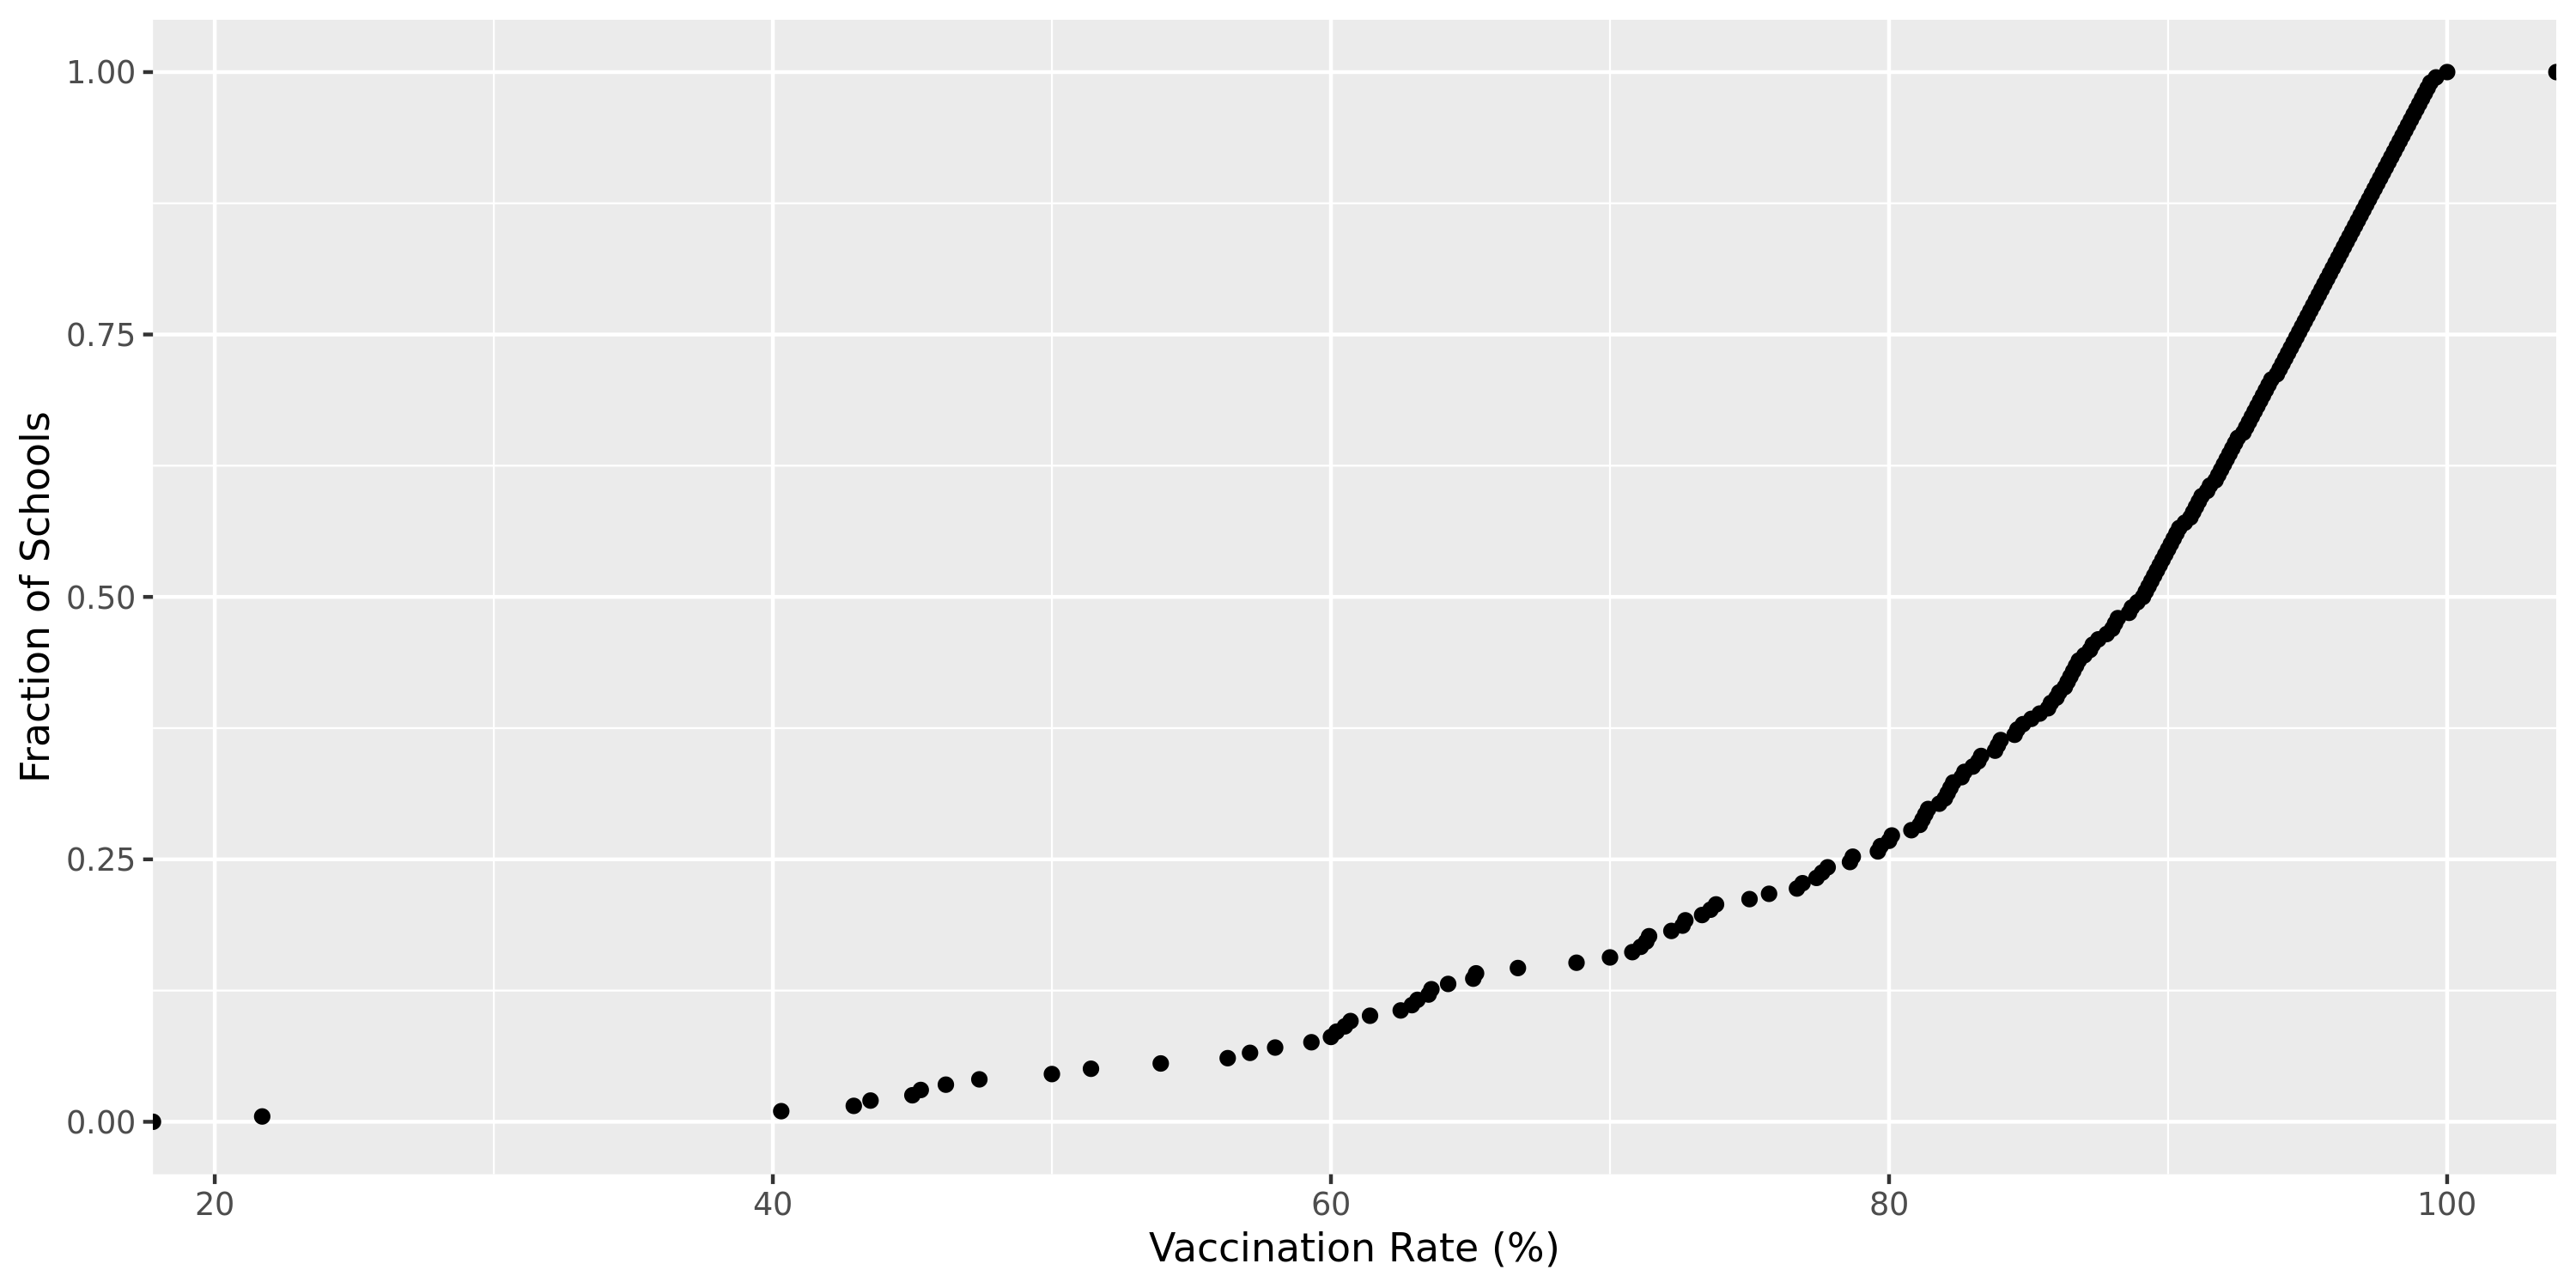

In [102]:
ggplot(overallrate_above95, aes(x=overall, y=rate_of_rate)) +
labs(x = 'Vaccination Rate (%)', y='Fraction of Schools')+
stat_ecdf(geom= 'point')

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [107]:
measles |> 
    filter(overall >= 95, state == 'North Carolina') |>
    select(overall) |>
    summarize(median = median(overall))

median
<dbl>
100
